In [1]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

<BarContainer object of 4 artists>

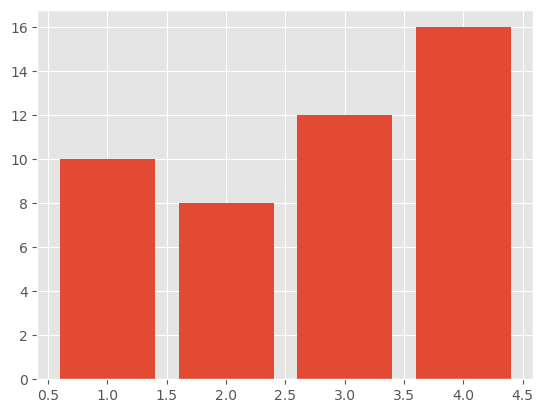

In [2]:
x=[1,2,3,4]
y=[10,8,12,16]
z=[12,20,21,23]
plt.bar(x,y,label='Week 1')


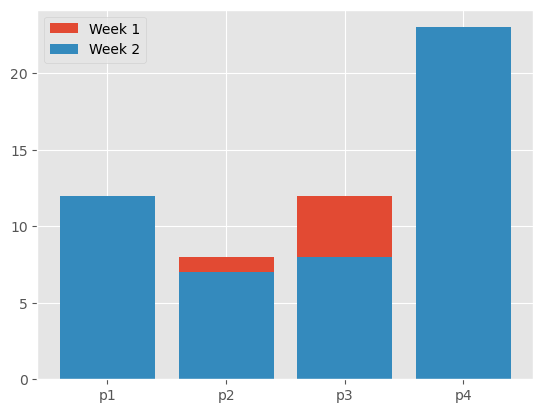

In [3]:
x=['p1','p2','p3','p4']
y=[10,8,12,16]
z=[12,7,8,23]
plt.bar(x,y,label='Week 1')
plt.bar(x,z,label='Week 2')
plt.legend()

In [4]:
import numpy as np

[0 1 2 3]


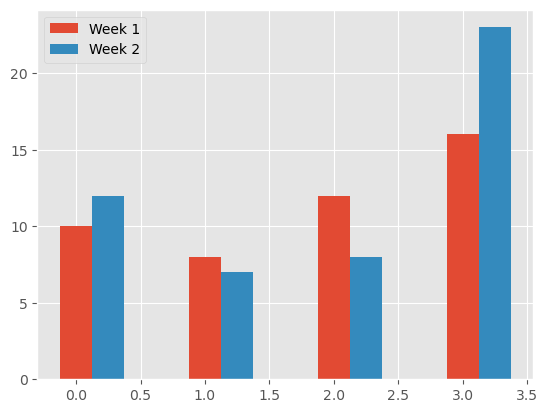

In [5]:
x_indexces=np.arange(len(x)) 
print(x_indexces)
plt.bar(x_indexces,y,label='Week 1',width=0.25)
plt.bar(x_indexces+0.25,z,label='Week 2',width=0.25)
plt.legend()

[0 1 2 3]


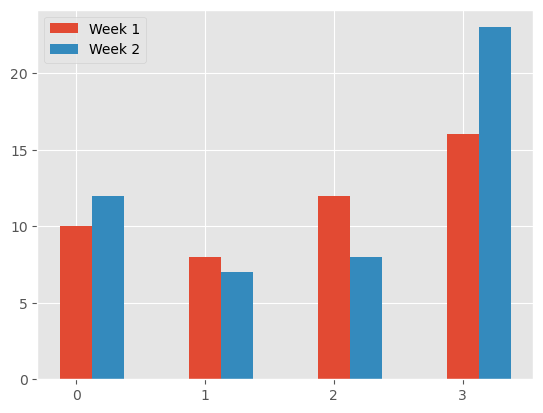

In [6]:
x_indexces=np.arange(len(x)) 
print(x_indexces)
plt.bar(x_indexces,y,label='Week 1',width=0.25)
plt.bar(x_indexces+0.25,z,label='Week 2',width=0.25)
plt.xticks(ticks=x_indexces,label=x)
plt.legend()

In [7]:
import pandas as pd
df=pd.read_csv('/Users/Rebin/Downloads/happiness (1).csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   country                                                   142 non-null    object 
 1   Rank                                                      142 non-null    int64  
 2   Happiness Score                                           142 non-null    float64
 3   Life Ladder                                               142 non-null    float64
 4   Log GDP per capita                                        139 non-null    float64
 5   Social support                                            142 non-null    float64
 6   Healthy life expectancy at birth                          140 non-null    float64
 7   Freedom to make life choices                              141 non-null    float64
 8   Generosity          

<BarContainer object of 142 artists>

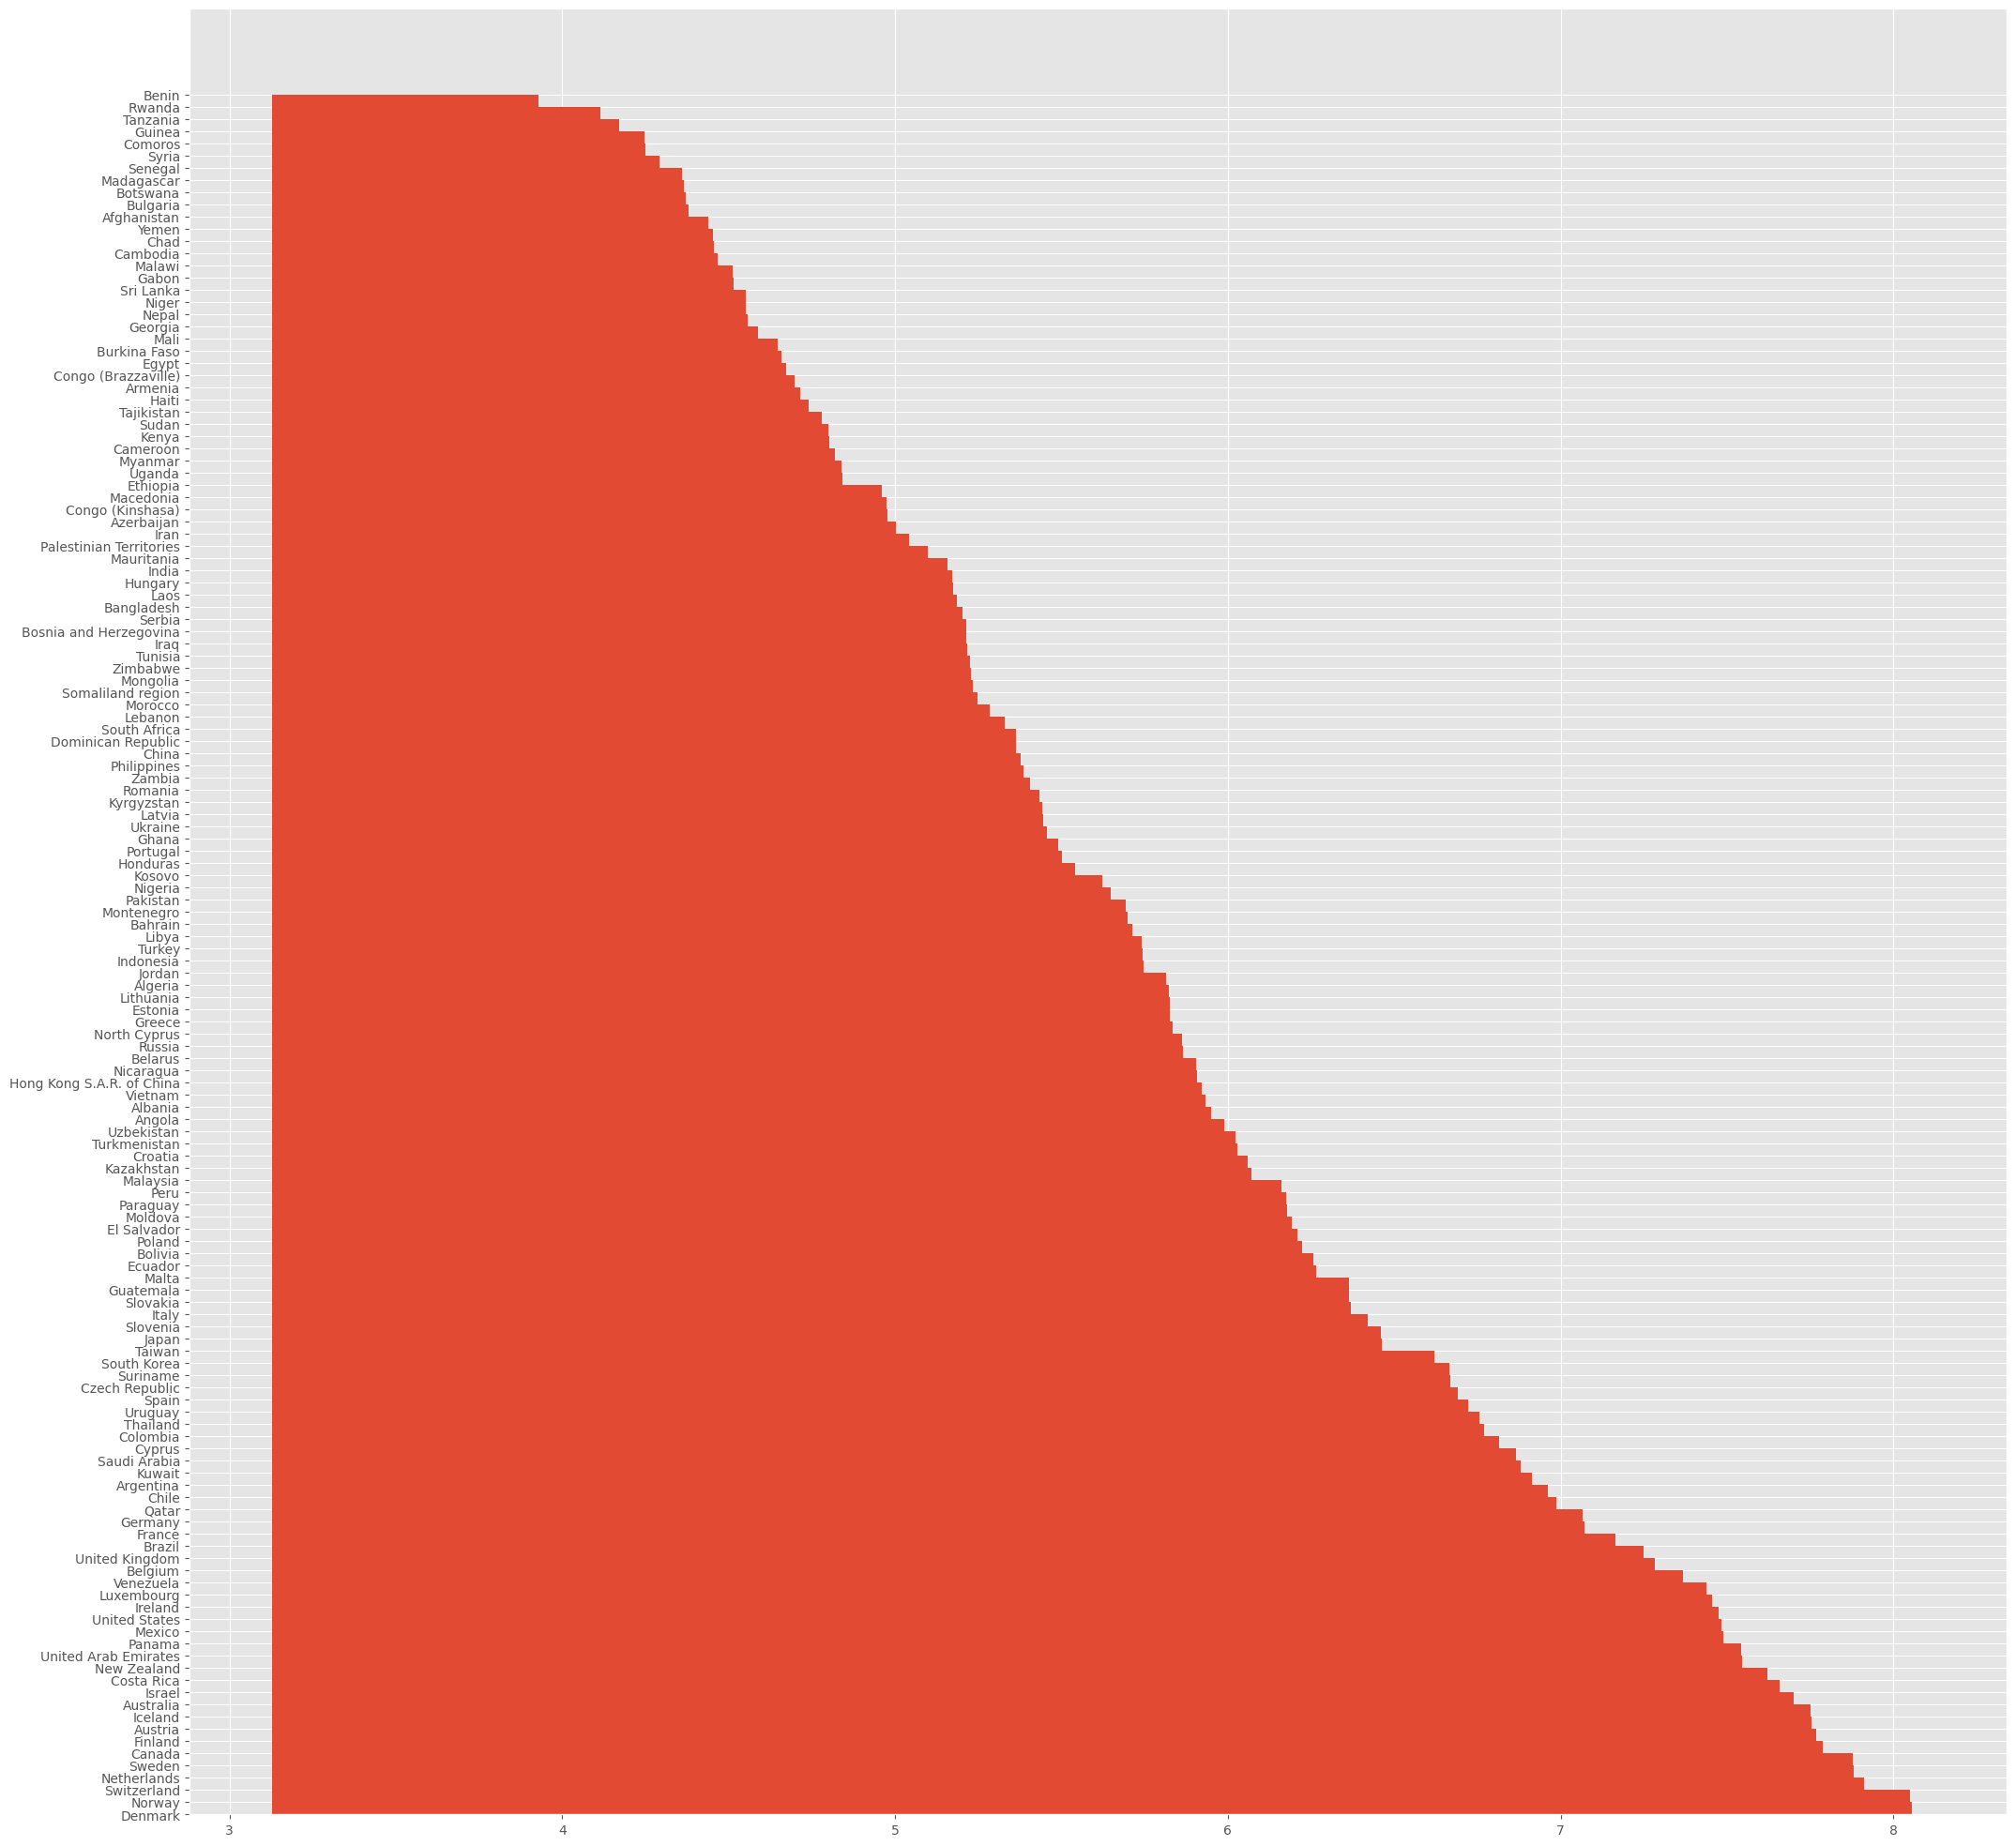

In [8]:
plt.figure(figsize=(25,25))
plt.bar(df['Happiness Score'],df['country'])

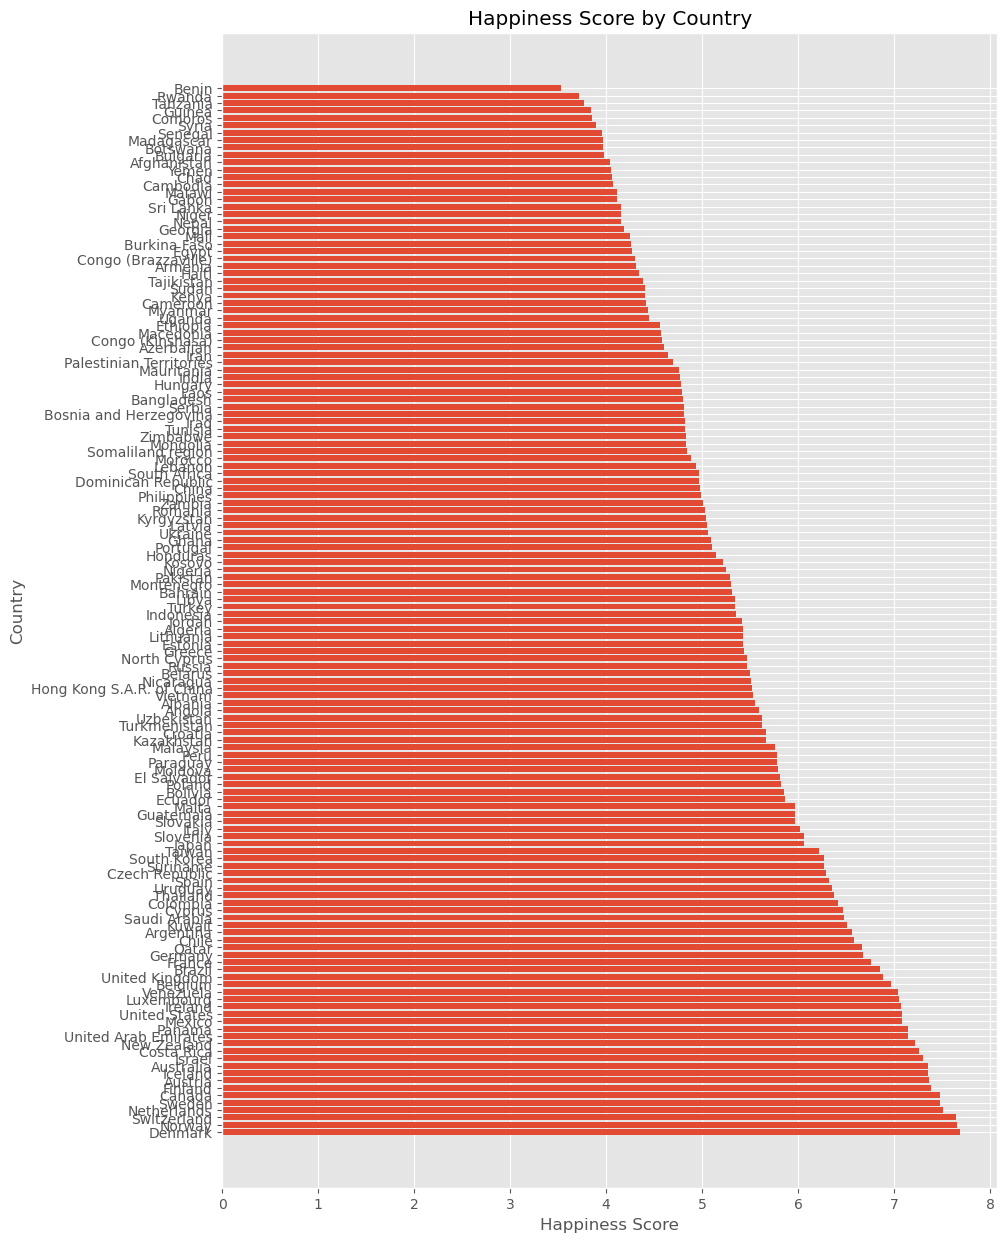

In [9]:
plt.style.use('ggplot')  # You can choose other styles like 'fivethirtyeight', 'seaborn', etc.
plt.figure(figsize=(10, 15))
plt.barh(df['country'], df['Happiness Score'])
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Happiness Score by Country')
plt.show()


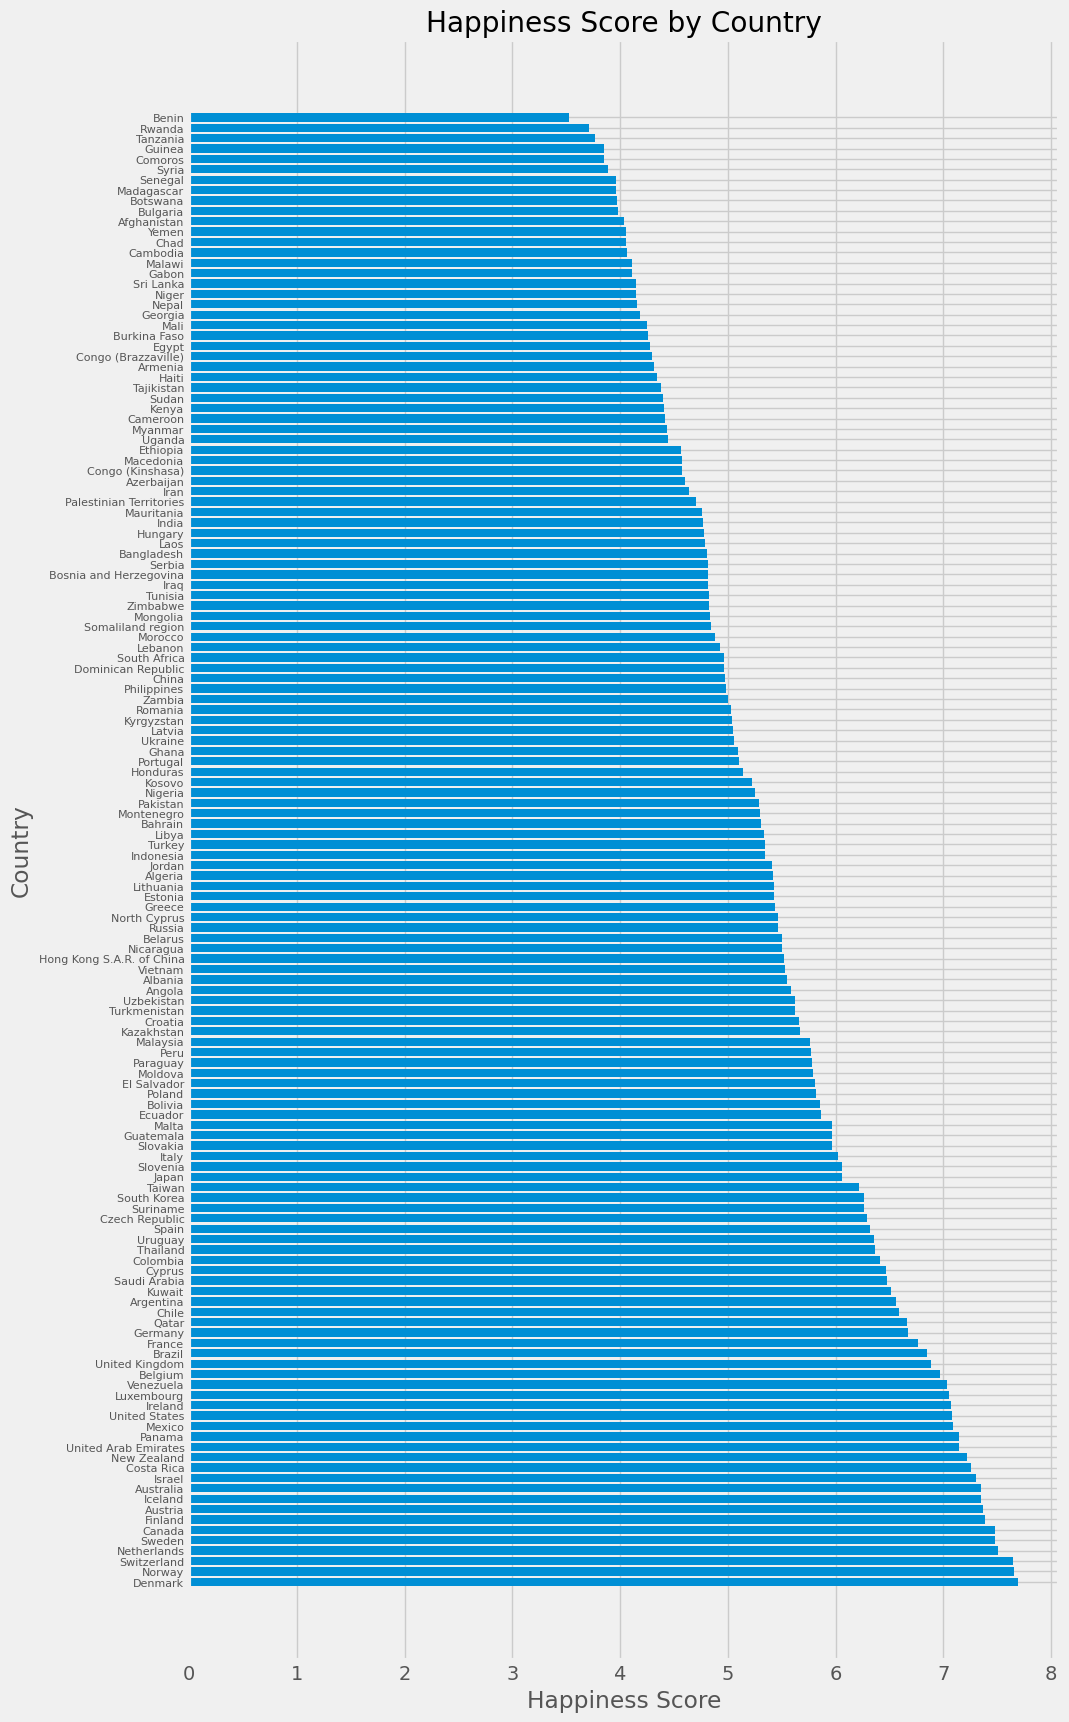

In [10]:
plt.style.use('fivethirtyeight')  # You can choose other styles like 'fivethirtyeight', 'seaborn', etc.
plt.figure(figsize=(10, 20))
plt.barh(df['country'], df['Happiness Score'])
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Happiness Score by Country')
ax = plt.gca()
ax.tick_params(axis='y', labelsize=8) 
plt.show()


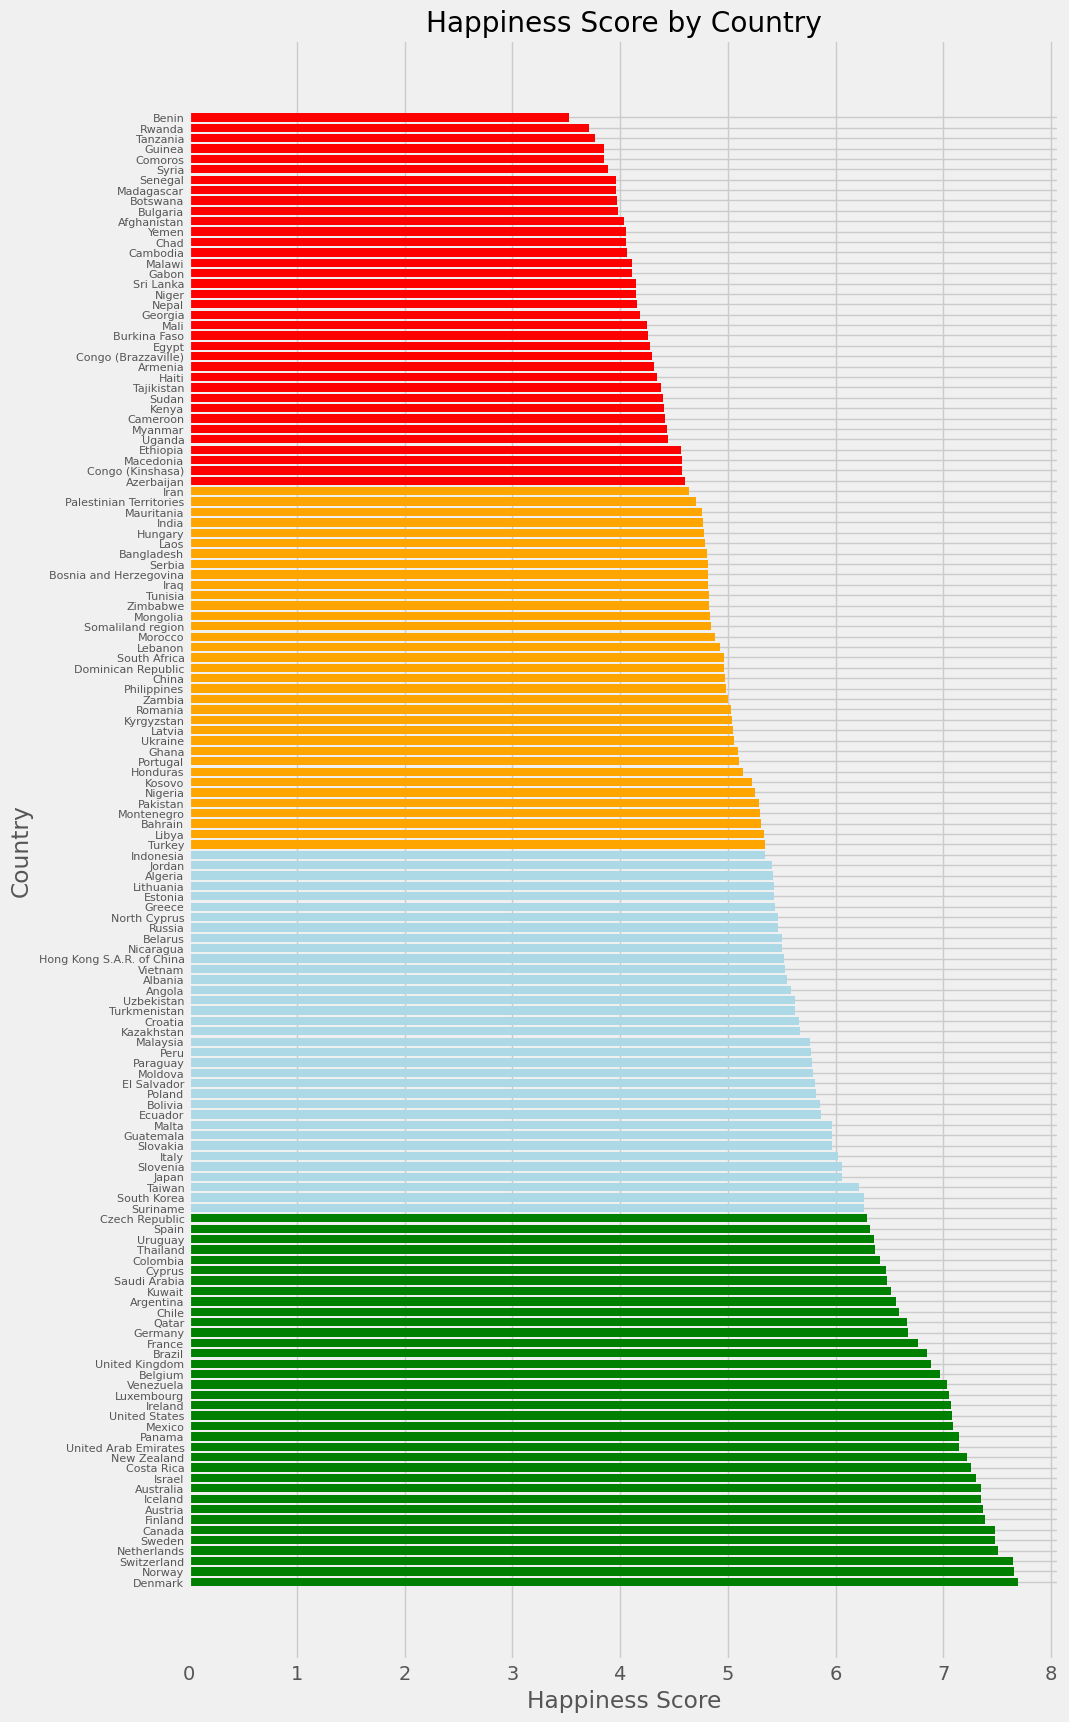

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
plt.style.use('fivethirtyeight')
# Create a categorical variable based on quartiles
df['Score Quartile'] = pd.qcut(df['Happiness Score'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Define colors for each quartile
color_mapping = {'Q1': 'red', 'Q2': 'orange', 'Q3': 'lightblue', 'Q4': 'green'}

# Map the color to each row in the dataframe
df['Color'] = df['Score Quartile'].map(color_mapping)

# Create the plot
plt.figure(figsize=(10, 20))
bars = plt.barh(df['country'], df['Happiness Score'], color=df['Color'])

# Set the labels and title
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Happiness Score by Country')

# Set the tick parameters
ax = plt.gca()
ax.tick_params(axis='y', labelsize=8) 

# Show the plot
plt.show()


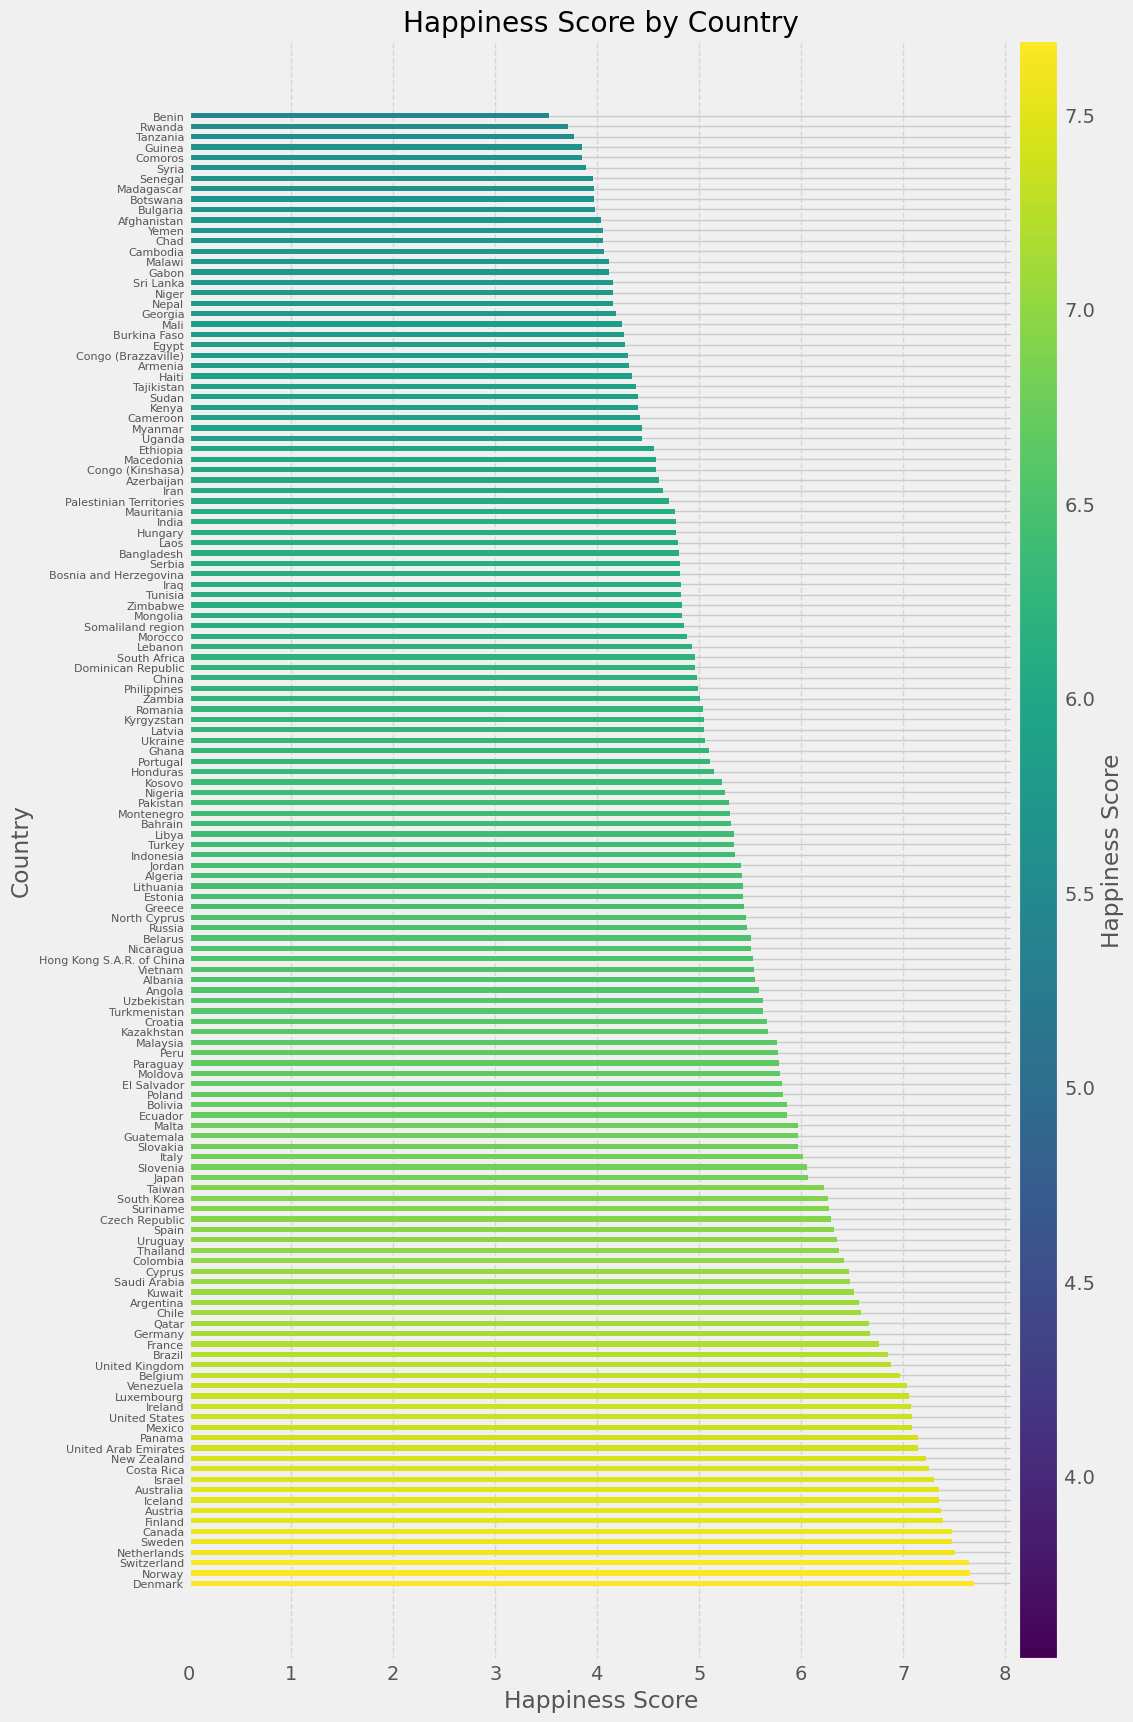

In [12]:

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Set style
#plt.style.use('fivethirtyeight')  # You can choose other styles like 'fivethirtyeight', 'seaborn', etc.

# Increase figure size for better visibility
plt.figure(figsize=(10, 20))

# Create a color map based on the Happiness Score
colors = plt.cm.viridis(df['Happiness Score'] / max(df['Happiness Score']))

# Create horizontal bar chart
bars = plt.barh(df['country'], df['Happiness Score'], color=colors, height=0.5)  # Adjust bar thickness

# Set labels and title
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Happiness Score by Country')

# Improve readability
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
ax = plt.gca()
ax.tick_params(axis='y', labelsize=8)  # Decrease font size of y-axis labels to fit better

# Optional: Rotate labels if still overlapping
# ax.set_yticklabels(df['country'], rotation=45)

# Add color bar to the right of the chart
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(df['Happiness Score']), vmax=max(df['Happiness Score']))), cax=cax, label='Happiness Score')

# Display the plot
plt.show()


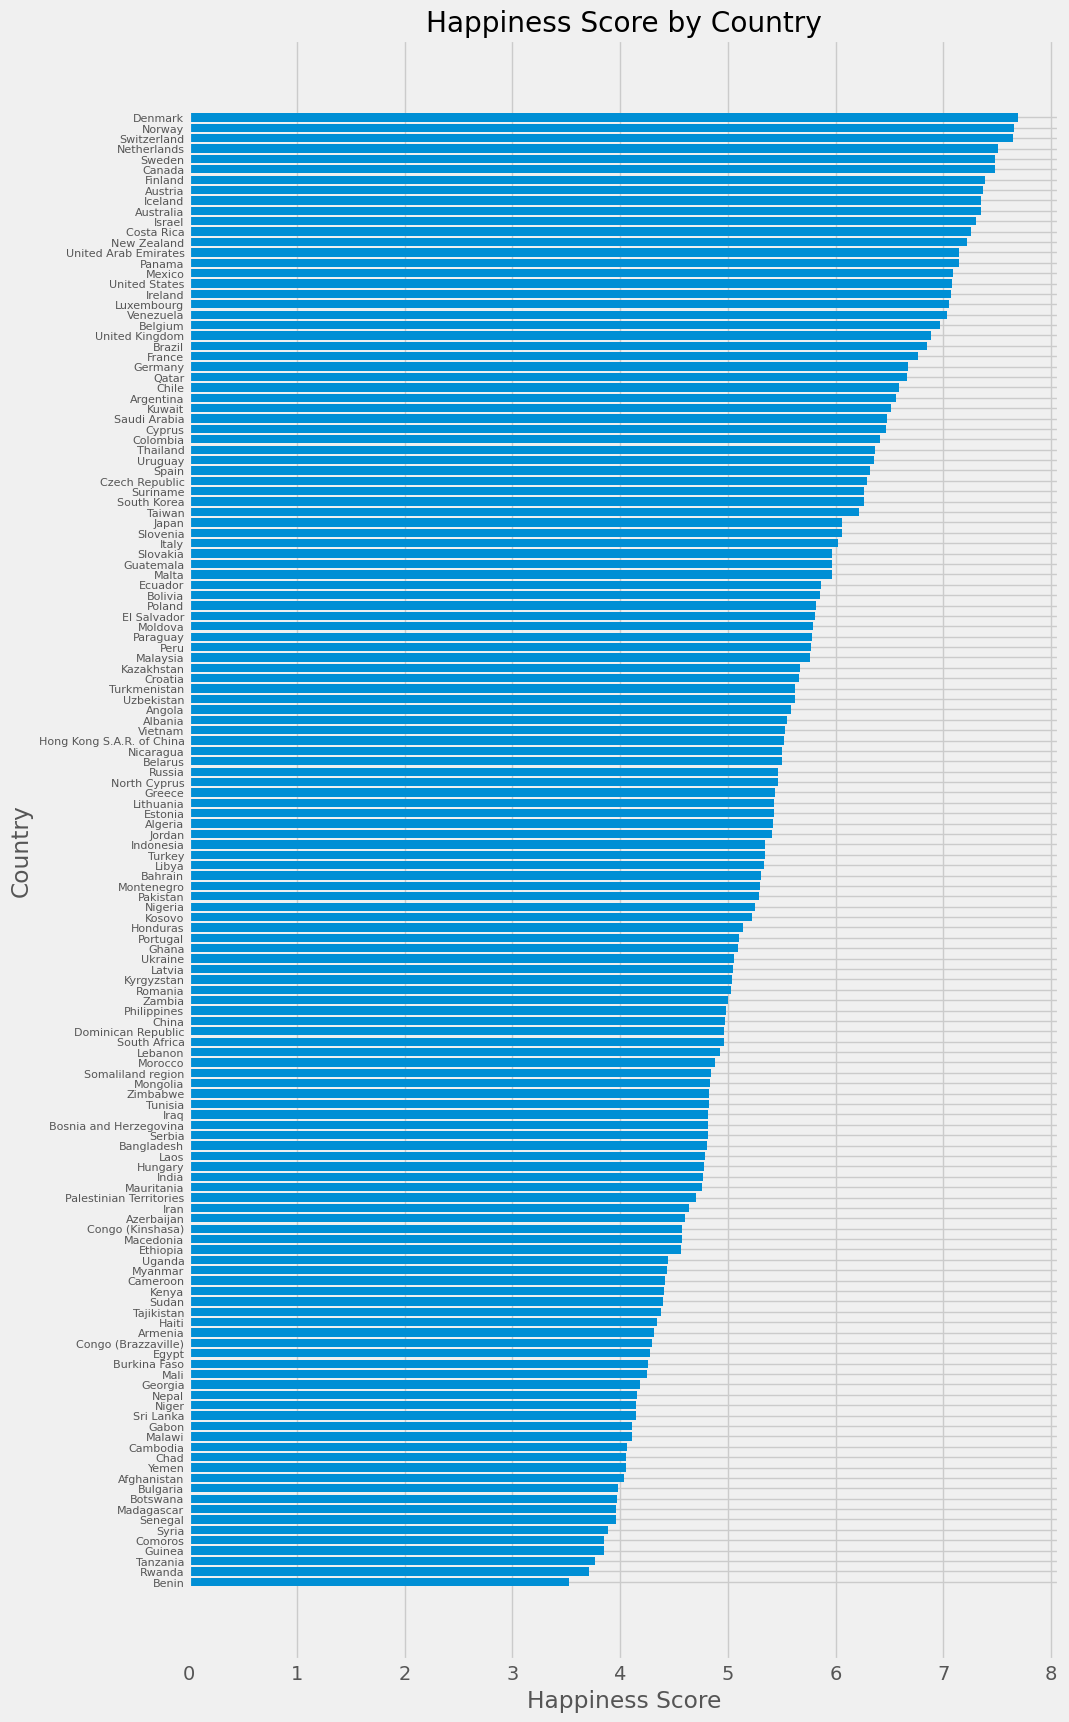

In [13]:
# Sort the dataframe by 'Happiness Score' in descending order
df_sorted = df.sort_values(by='Happiness Score', ascending=True)

# Now when you plot, the bars will start from the largest 'Happiness Score' to the smallest
plt.style.use('fivethirtyeight')  
plt.figure(figsize=(10, 20))
plt.barh(df_sorted['country'], df_sorted['Happiness Score'])
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Happiness Score by Country')
ax = plt.gca()
ax.tick_params(axis='y', labelsize=8) 
plt.show()


In [14]:
import plotly.express as px

# Assuming your dataframe 'df' has a 'country' column with country names, and a 'Happiness Score' column

fig = px.choropleth(df,
                    locations="country",  # DataFrame column with locations
                    locationmode='country names',  # Set to recognize countries by name
                    color="Happiness Score",  # DataFrame column with values used to color the map
                    hover_name="country",  # DataFrame column hover info
                    color_continuous_scale=px.colors.sequential.Plasma)  # Predefined color scale

fig.update_layout(title='Global Happiness Scores')

fig.show()
